In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, confusion_matrix

from IPython.core.display import HTML
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)


<a id='0'></a>
<div style="background: linear-gradient(45deg, #1a1a2e, #16213e); padding: 20px; border-radius: 15px; box-shadow: 0 4px 8px rgba(0,0,0,0.3);">
    <h2 style="font-size: 28px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; text-shadow: 2px 2px 4px #000;">
        <strong>🤖 ML Model Comparison Showdown 🧠</strong>
    </h2>
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="margin-bottom: 10px;">
            <a href="#1.0" style="color: #4ecca3; text-decoration: none; font-size: 18px; font-weight: bold;">🛠️ Table of Contestants (shortcuts)</a>
            <ul style="list-style-type: none; padding-left: 20px;">
                <li><a href="#2.0" style="color: #e8e8e8; text-decoration: none;">📊 Logistic Regression Analyzer</a></li>
                <li><a href="#3.0" style="color: #e8e8e8; text-decoration: none;">🏘️ K-Nearest Neighbors Clusterer</a></li>
                <li><a href="#4.0" style="color: #e8e8e8; text-decoration: none;">🌳 Decision Tree Brancher</a></li>
                <li><a href="#5.0" style="color: #e8e8e8; text-decoration: none;">🌲 Random Forest Ensemble</a></li>
                <li><a href="#6.0" style="color: #e8e8e8; text-decoration: none;">🚀 AdaBoost Accelerator</a></li>
                <li><a href="#7.0" style="color: #e8e8e8; text-decoration: none;">📈 Gradient Boosting Optimizer</a></li>
                <li><a href="#8.0" style="color: #e8e8e8; text-decoration: none;">🔥 XGBoost Extreme Learner</a></li>
                <li><a href="#9.0" style="color: #e8e8e8; text-decoration: none;">🐱 CatBoost Categorical Crusher</a></li>
                <li><a href="#10.0" style="color: #e8e8e8; text-decoration: none;">🌴 Extra Trees Randomizer</a></li>
                <li><a href="#11.0" style="color: #e8e8e8; text-decoration: none;">💡 LightGBM Speed Demon</a></li>
                <li><a href="#12.0" style="color: #e8e8e8; text-decoration: none;">🗳️ Voting Classifier Democratizer</a></li>
                <li><a href="#13.0" style="color: #e8e8e8; text-decoration: none;">🧠 Artificial Neural Network</a></li>
            </ul>
        </li>
        <li style="margin-top: 15px;">
            <a href="#14.0" style="color: #4ecca3; text-decoration: none; font-size: 18px; font-weight: bold;">🏆 Model Showdown Results</a>
                        <ul style="list-style-type: none; padding-left: 20px;">
                <li><a href="#15.0" style="color: #e8e8e8; text-decoration: none;">🎉 Winner</a></li>
                            </ul>
        </li>
    </ul>
</div>

In [2]:
data_preprocessed = pd.read_csv('BW_bookings_predictiondata_2021-present2.csv')
data_preprocessed

,month_of_booking,day_of_booking,weekday_of_booking,month_of_arrival,day_of_arrival,weekday_of_arrival,num_of_nights,is_repeated_guest,previous_stays,previous_cancellations,booking_to_arrival_duration,rate,override,is_canceled
0,4,1,4,1,1,4,1,1,0,0,0,89.25,89.25,0
1,0,24,0,1,1,4,2,0,0,0,312,76.30,80.61,1
2,4,1,4,1,1,4,1,0,0,0,0,116.10,0.00,0
3,6,13,6,1,1,4,9,0,0,0,19,79.00,79.00,0
4,3,31,3,1,1,4,1,1,0,0,1,129.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52173,6,12,6,5,20,0,6,0,0,0,8,98.04,97.59,0
52174,3,25,3,5,20,0,3,1,1,0,25,88.06,88.00,0
52175,0,15,0,5,20,0,2,0,0,0,35,92.65,92.65,0
52176,1,18,1,5,20,0,1,1,0,0,307,119.00,107.10,0


### Create the targets

In [3]:
data = data_preprocessed.copy()

targets = data.is_canceled

In [4]:
data

,month_of_booking,day_of_booking,weekday_of_booking,month_of_arrival,day_of_arrival,weekday_of_arrival,num_of_nights,is_repeated_guest,previous_stays,previous_cancellations,booking_to_arrival_duration,rate,override,is_canceled
0,4,1,4,1,1,4,1,1,0,0,0,89.25,89.25,0
1,0,24,0,1,1,4,2,0,0,0,312,76.30,80.61,1
2,4,1,4,1,1,4,1,0,0,0,0,116.10,0.00,0
3,6,13,6,1,1,4,9,0,0,0,19,79.00,79.00,0
4,3,31,3,1,1,4,1,1,0,0,1,129.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52173,6,12,6,5,20,0,6,0,0,0,8,98.04,97.59,0
52174,3,25,3,5,20,0,3,1,1,0,25,88.06,88.00,0
52175,0,15,0,5,20,0,2,0,0,0,35,92.65,92.65,0
52176,1,18,1,5,20,0,1,1,0,0,307,119.00,107.10,0


### Create the inputs

In [5]:
unscaled_inputs = data.drop(columns='is_canceled')
unscaled_inputs

,month_of_booking,day_of_booking,weekday_of_booking,month_of_arrival,day_of_arrival,weekday_of_arrival,num_of_nights,is_repeated_guest,previous_stays,previous_cancellations,booking_to_arrival_duration,rate,override
0,4,1,4,1,1,4,1,1,0,0,0,89.25,89.25
1,0,24,0,1,1,4,2,0,0,0,312,76.30,80.61
2,4,1,4,1,1,4,1,0,0,0,0,116.10,0.00
3,6,13,6,1,1,4,9,0,0,0,19,79.00,79.00
4,3,31,3,1,1,4,1,1,0,0,1,129.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52173,6,12,6,5,20,0,6,0,0,0,8,98.04,97.59
52174,3,25,3,5,20,0,3,1,1,0,25,88.06,88.00
52175,0,15,0,5,20,0,2,0,0,0,35,92.65,92.65
52176,1,18,1,5,20,0,1,1,0,0,307,119.00,107.10


In [6]:
x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs, targets, train_size=0.9, random_state=10)

In [7]:
# We are training this model on 341 observations, by 11 columns.
print(x_train.shape, y_train.shape)

(46960, 13) (46960,)


In [8]:
# We are testing this model on 38
print(x_test.shape, y_test.shape)

(5218, 13) (5218,)


<a id = '2.0'></a>
# Model Building

<a id='2.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0;">
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        📊 Logistic Regression Analyzer
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Probability-Based Binary Classification Engine
    </p>
</div>

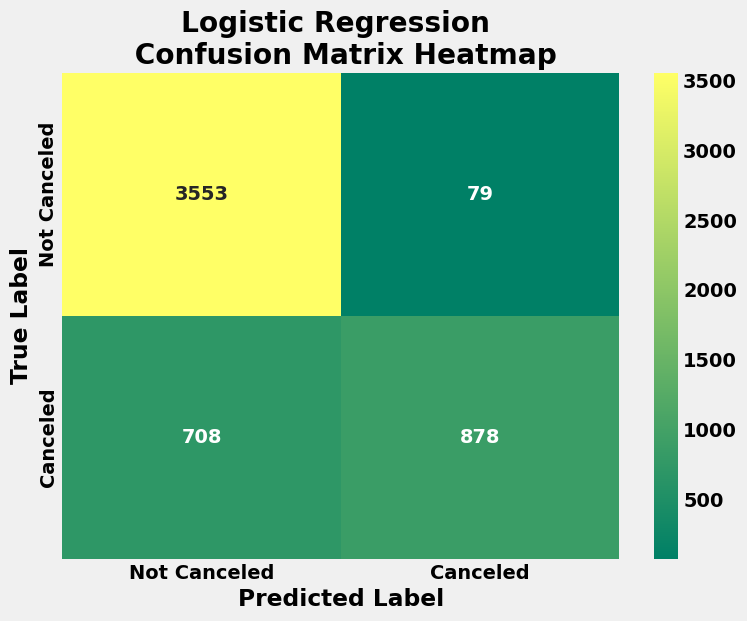

Accuracy Score of Decision Tree is : 0.8522359454855196
Confusion Matrix : 
[[3553   79]
 [ 708  878]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3632
           1       0.92      0.55      0.69      1586

    accuracy                           0.85      5218
   macro avg       0.88      0.77      0.80      5218
weighted avg       0.86      0.85      0.84      5218



In [9]:
# Instantiate model object
reg = LogisticRegression()

# Fit data to model
reg.fit(x_train, y_train)

# Test the model
r_squared = reg.score(x_train, y_train)
acc_lr = r_squared

y_true = y_train   # True labels

y_pred = reg.predict(x_train)  # Predicted labels for training data

y_test_pred = reg.predict(x_test) # Predicted labels for test data

clf_report = classification_report(y_test, y_test_pred)


# Calculate precision
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
# Print or display the results

# Calculate confusion matrix
conf = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="summer", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression \n Confusion Matrix Heatmap")
plt.show()

print(f"Accuracy Score of Decision Tree is : {r_squared}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='3.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0;">
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🏘️ K-Nearest Neighbors Clusterer
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Proximity-Based Pattern Recognition Algorithm
    </p>
</div>

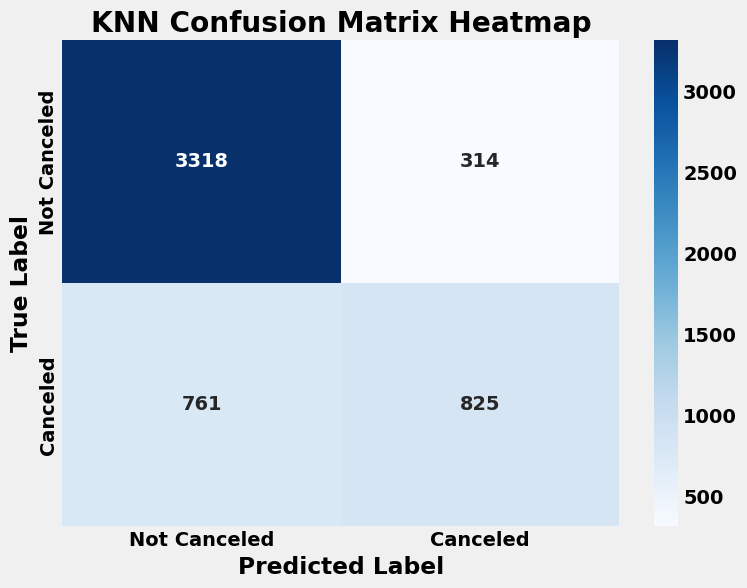

Accuracy Score of Decision Tree is : 0.7939823687236489
Confusion Matrix : 
[[3318  314]
 [ 761  825]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      3632
           1       0.72      0.52      0.61      1586

    accuracy                           0.79      5218
   macro avg       0.77      0.72      0.73      5218
weighted avg       0.79      0.79      0.78      5218



In [10]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix Heatmap")
plt.show()
print(f"Accuracy Score of Decision Tree is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='4.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0;">
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🌳 Decision Tree Brancher
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Hierarchical Feature-Based Splitting Algorithm
    </p>
</div>

In [11]:
data = data_preprocessed.copy()

targets = data.is_canceled

unscaled_inputs = data.drop(columns='is_canceled')

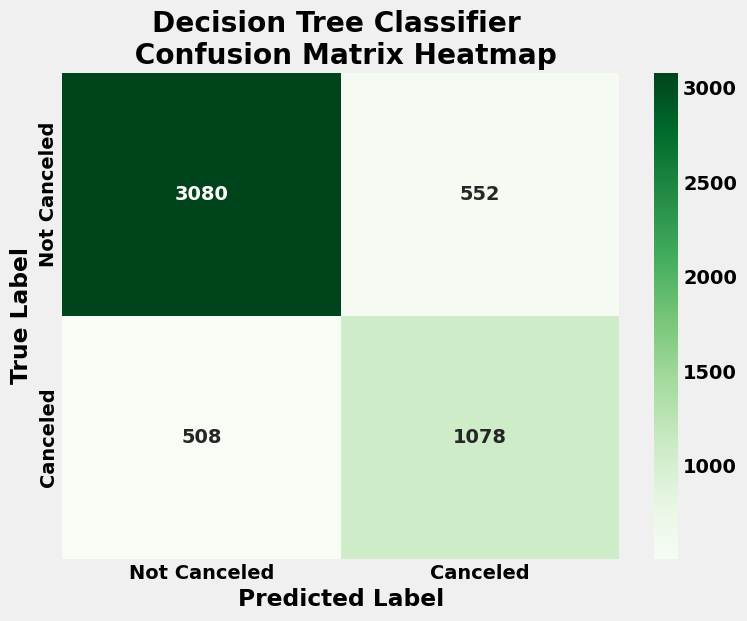

Accuracy Score of Decision Tree is : 0.7968570333461096
Confusion Matrix : 
[[3080  552]
 [ 508 1078]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3632
           1       0.66      0.68      0.67      1586

    accuracy                           0.80      5218
   macro avg       0.76      0.76      0.76      5218
weighted avg       0.80      0.80      0.80      5218



In [12]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)
y_train_pred_dtc = dtc.predict(x_train)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Classifier \n Confusion Matrix Heatmap")
plt.show()



print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='5.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 10px; left: 10px; font-size: 24px;">🌲</div>
    <div style="position: absolute; top: 10px; right: 10px; font-size: 24px;">🌳</div>
    <div style="position: absolute; bottom: 10px; left: 10px; font-size: 24px;">🌴</div>
    <div style="position: absolute; bottom: 10px; right: 10px; font-size: 24px;">🌲</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🌲 Random Forest Ensemble
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Multi-Tree Aggregated Prediction System
    </p>
</div>

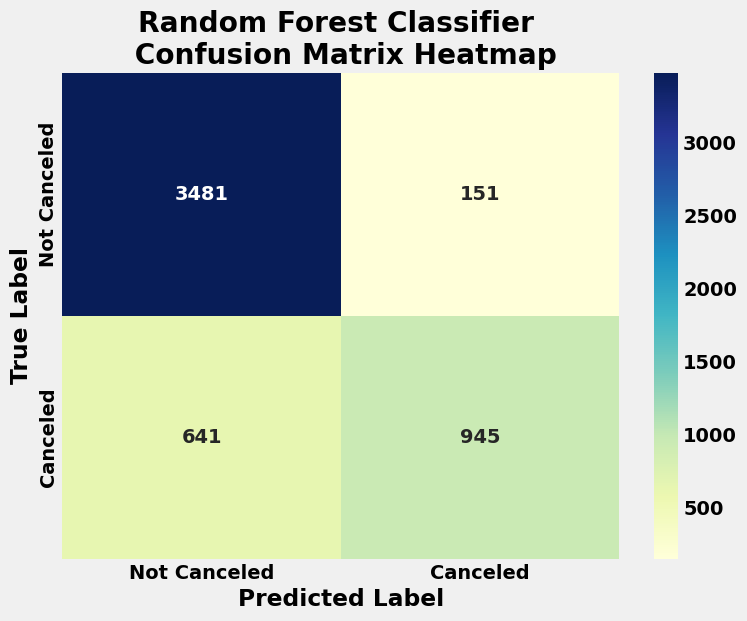

Accuracy Score of Random Forest is : 0.8482177079340744
Confusion Matrix : 
[[3481  151]
 [ 641  945]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3632
           1       0.86      0.60      0.70      1586

    accuracy                           0.85      5218
   macro avg       0.85      0.78      0.80      5218
weighted avg       0.85      0.85      0.84      5218



In [13]:
rd_clf = RandomForestClassifier()
rd_clf.fit(x_train, y_train)

y_pred_rd_clf = rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rd_clf)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Classifier \n Confusion Matrix Heatmap")
plt.show()



print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='6.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">🚀</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">🚀</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🚀 AdaBoost Accelerator
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Iterative Error-Focused Learning Algorithm
    </p>
</div>

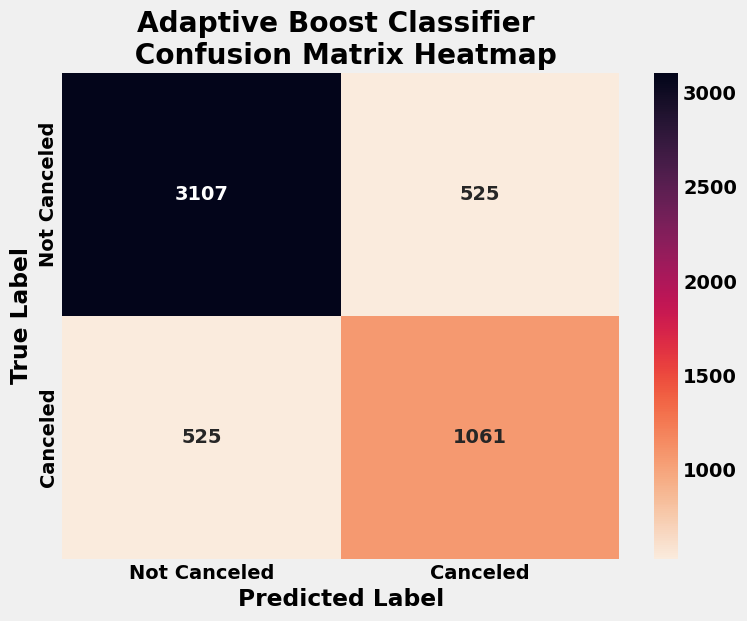

Accuracy Score of AdaBoost Classifier is : 0.7987734764277501
Confusion Matrix : 
[[3107  525]
 [ 525 1061]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3632
           1       0.67      0.67      0.67      1586

    accuracy                           0.80      5218
   macro avg       0.76      0.76      0.76      5218
weighted avg       0.80      0.80      0.80      5218



In [14]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(x_train, y_train)

y_pred_ada = ada.predict(x_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="rocket_r", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Adaptive Boost Classifier \n Confusion Matrix Heatmap")
plt.show()


print(f"Accuracy Score of AdaBoost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='7.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">🌟</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">🌟</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🌟 Gradient Boosting Classifier
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Sequential Boosting Technique for Classification
    </p>
</div>


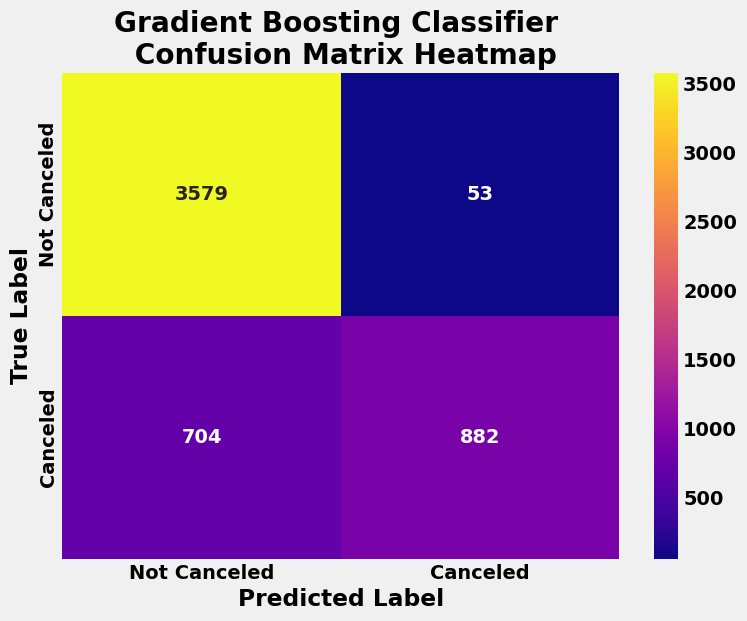

Accuracy Score of Gradient Boosting Classifier is : 0.8549252587198161
Confusion Matrix : 
[[3579   53]
 [ 704  882]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.99      0.90      3632
           1       0.94      0.56      0.70      1586

    accuracy                           0.85      5218
   macro avg       0.89      0.77      0.80      5218
weighted avg       0.87      0.85      0.84      5218



In [15]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="plasma", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Gradient Boosting Classifier \n Confusion Matrix Heatmap")
plt.show()


print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='8.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">⚡</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">⚡</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        ⚡ XGBoost Classifier
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Extreme Gradient Boosting for Classification
    </p>
</div>


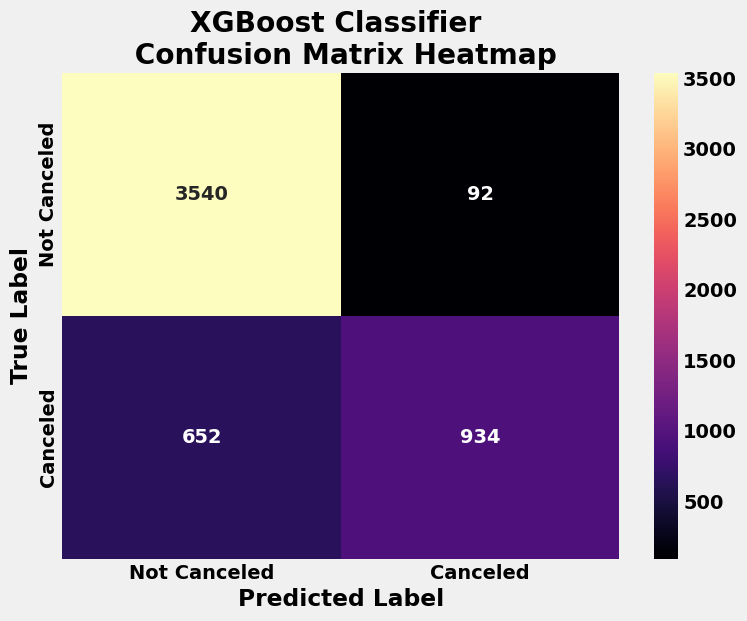

Accuracy Score of XGBoost Classifier is : 0.8574166347259486
Confusion Matrix : 
[[3540   92]
 [ 652  934]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3632
           1       0.91      0.59      0.72      1586

    accuracy                           0.86      5218
   macro avg       0.88      0.78      0.81      5218
weighted avg       0.86      0.86      0.85      5218



In [16]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="magma", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Classifier \n Confusion Matrix Heatmap")
plt.show()

print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='9.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">🐱</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">🐱</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🐱 Cat Boost Classifier
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        High-Performance Gradient Boosting for Categorical Features
    </p>
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none;">
        <span class="numbers" style="position: absolute; left: 10%; top: 20%; font-size: 24px; color: #2db1fc;">42</span>
        <span style="position: absolute; left: 30%; top: 40%; font-size: 18px;">Intel</span>
        <span class="numbers" style="position: absolute; left: 50%; top: 60%; font-size: 20px; color: #2db1fc;">8729</span>
        <span style="position: absolute; left: 70%; top: 80%; font-size: 22px;">blue</span>
        <span class="numbers" style="position: absolute; left: 80%; top: 30%; font-size: 24px; color: #2db1fc;">84.3</span>
        <span style="position: absolute; left: 60%; top: 10%; font-size: 18px;">June</span>
        <span style="position: absolute; left: 20%; top: 50%; font-size: 22px;">Bob</span>
        <span class="numbers" style="position: absolute; left: 5%; top: 10%; font-size: 24px;">Night</span>
        <span style="position: absolute; left: 90%; top: 80%; font-size: 18px;">teacher</span>
        <!-- Add more random numbers and words as needed -->
    </div>
</div>


In [17]:
cat = CatBoostClassifier(iterations=100)
cat.fit(x_train, y_train)

y_pred_cat = cat.predict(x_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)


Learning rate set to 0.440313
0:	learn: 0.4989108	total: 154ms	remaining: 15.3s
1:	learn: 0.4174912	total: 161ms	remaining: 7.91s
2:	learn: 0.3786835	total: 168ms	remaining: 5.44s
3:	learn: 0.3617605	total: 175ms	remaining: 4.19s
4:	learn: 0.3460949	total: 180ms	remaining: 3.43s
5:	learn: 0.3379144	total: 186ms	remaining: 2.92s
6:	learn: 0.3339030	total: 191ms	remaining: 2.54s
7:	learn: 0.3301968	total: 195ms	remaining: 2.24s
8:	learn: 0.3278224	total: 199ms	remaining: 2.01s
9:	learn: 0.3261880	total: 203ms	remaining: 1.82s
10:	learn: 0.3238544	total: 206ms	remaining: 1.67s
11:	learn: 0.3226740	total: 210ms	remaining: 1.54s
12:	learn: 0.3210625	total: 213ms	remaining: 1.43s
13:	learn: 0.3206278	total: 217ms	remaining: 1.33s
14:	learn: 0.3199798	total: 220ms	remaining: 1.25s
15:	learn: 0.3195692	total: 224ms	remaining: 1.17s
16:	learn: 0.3190336	total: 227ms	remaining: 1.11s
17:	learn: 0.3182736	total: 230ms	remaining: 1.05s
18:	learn: 0.3178098	total: 234ms	remaining: 996ms
19:	learn: 

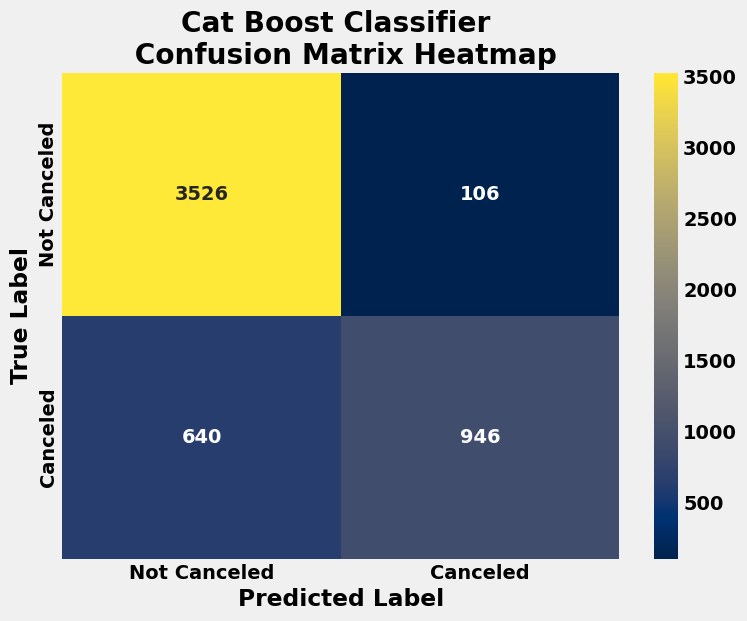

Accuracy Score of Ada Boost Classifier is : 0.8570333461096206
Confusion Matrix : 
[[3526  106]
 [ 640  946]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      3632
           1       0.90      0.60      0.72      1586

    accuracy                           0.86      5218
   macro avg       0.87      0.78      0.81      5218
weighted avg       0.86      0.86      0.85      5218



In [18]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="cividis", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Cat Boost Classifier \n Confusion Matrix Heatmap")
plt.show()
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='10.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">🌳</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">🌳</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🌳 Extra Trees Classifier
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Ensemble Method for Enhanced Predictive Accuracy
    </p>
    <div style="position: absolute; top: 50%; left: 5%; transform: translate(-50%, -50%); width: 0; height: 0; border-left: 20px solid transparent; border-right: 20px solid transparent; border-bottom: 40px solid #6aa84f;"></div>
    <div style="position: absolute; top: 50%; right: 5%; transform: translate(50%, -50%); width: 0; height: 0; border-left: 20px solid transparent; border-right: 20px solid transparent; border-bottom: 40px solid #6aa84f;"></div>
</div>


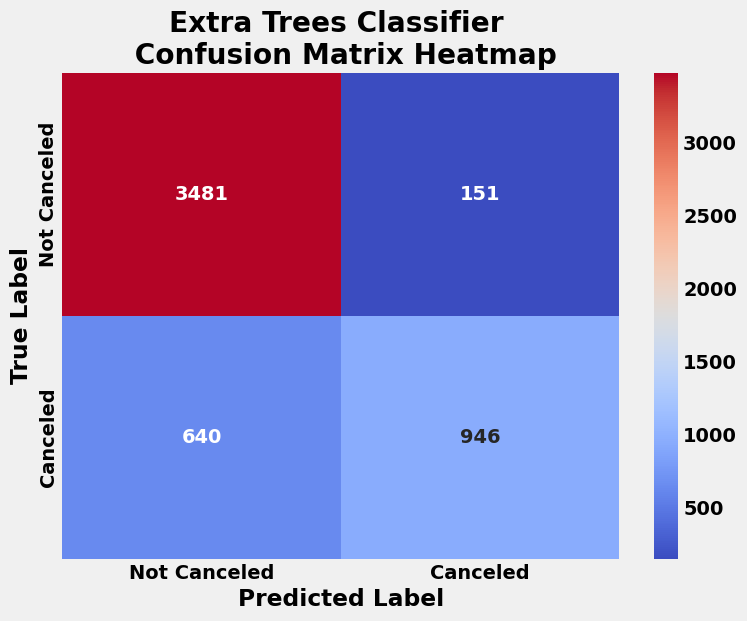

Accuracy Score of Extra Trees Classifier is : 0.8484093522422385
Confusion Matrix : 
[[3481  151]
 [ 640  946]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3632
           1       0.86      0.60      0.71      1586

    accuracy                           0.85      5218
   macro avg       0.85      0.78      0.80      5218
weighted avg       0.85      0.85      0.84      5218



In [19]:
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred_etc = etc.predict(x_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="coolwarm", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Extra Trees Classifier \n Confusion Matrix Heatmap")
plt.show()

print(f"Accuracy Score of Extra Trees Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='11.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">⚡</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">⚡</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        ⚡ LGBM Classifier
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Light Gradient Boosting Machine
    </p>
</div>


[LightGBM] [Info] Number of positive: 14206, number of negative: 32754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1238
[LightGBM] [Info] Number of data points in the train set: 46960, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302513 -> initscore=-0.835361
[LightGBM] [Info] Start training from score -0.835361


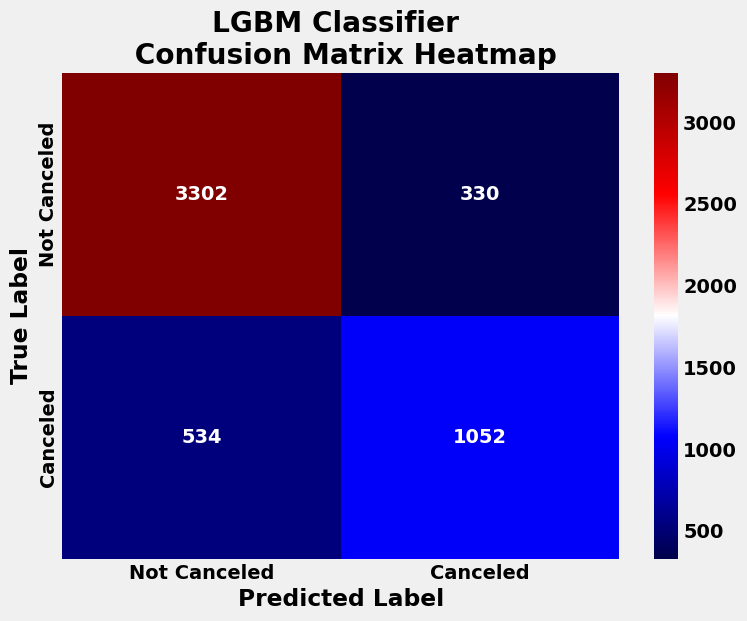

Accuracy Score of LGBM Classifier is : 0.834419317746263
Confusion Matrix : 
[[3302  330]
 [ 534 1052]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3632
           1       0.76      0.66      0.71      1586

    accuracy                           0.83      5218
   macro avg       0.81      0.79      0.80      5218
weighted avg       0.83      0.83      0.83      5218



In [20]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(x_train, y_train)

y_pred_lgbm = lgbm.predict(x_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="seismic", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LGBM Classifier \n Confusion Matrix Heatmap")
plt.show()

print(f"Accuracy Score of LGBM Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

<a id='12.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">🗳️</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">🗳️</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🗳️ Voting Classifier
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Ensemble Voting System
    </p>
</div>


In [21]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', cat), ('XGboost', xgb),  ('Decision Tree', dtc),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', reg),
               ('Knn', knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(x_train, y_train)

Learning rate set to 0.440313
0:	learn: 0.4989108	total: 4.42ms	remaining: 438ms
1:	learn: 0.4174912	total: 8.32ms	remaining: 408ms
2:	learn: 0.3786835	total: 12.3ms	remaining: 399ms
3:	learn: 0.3617605	total: 16.3ms	remaining: 392ms
4:	learn: 0.3460949	total: 20.7ms	remaining: 393ms
5:	learn: 0.3379144	total: 25ms	remaining: 391ms
6:	learn: 0.3339030	total: 29ms	remaining: 385ms
7:	learn: 0.3301968	total: 32.8ms	remaining: 377ms
8:	learn: 0.3278224	total: 36.6ms	remaining: 371ms
9:	learn: 0.3261880	total: 40.6ms	remaining: 365ms
10:	learn: 0.3238544	total: 44.4ms	remaining: 359ms
11:	learn: 0.3226740	total: 48.1ms	remaining: 353ms
12:	learn: 0.3210625	total: 51.5ms	remaining: 345ms
13:	learn: 0.3206278	total: 55ms	remaining: 338ms
14:	learn: 0.3199798	total: 58.3ms	remaining: 330ms
15:	learn: 0.3195692	total: 61.7ms	remaining: 324ms
16:	learn: 0.3190336	total: 64.9ms	remaining: 317ms
17:	learn: 0.3182736	total: 68.3ms	remaining: 311ms
18:	learn: 0.3178098	total: 71.8ms	remaining: 306m

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier()),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x000002225BAACE50>),
                             ('XGboost',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=Non...
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Extra Tree', ExtraTreesClassifier()),
                             ('Light Gradient',
                              LGBMClassifier(learning_rate=1)),
                             ('Random Forest', RandomForestClassifier()),
                             ('Ada Boost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                             ('Logistic', LogisticRegression()),
                             ('Knn', KNeighborsClassifier())])

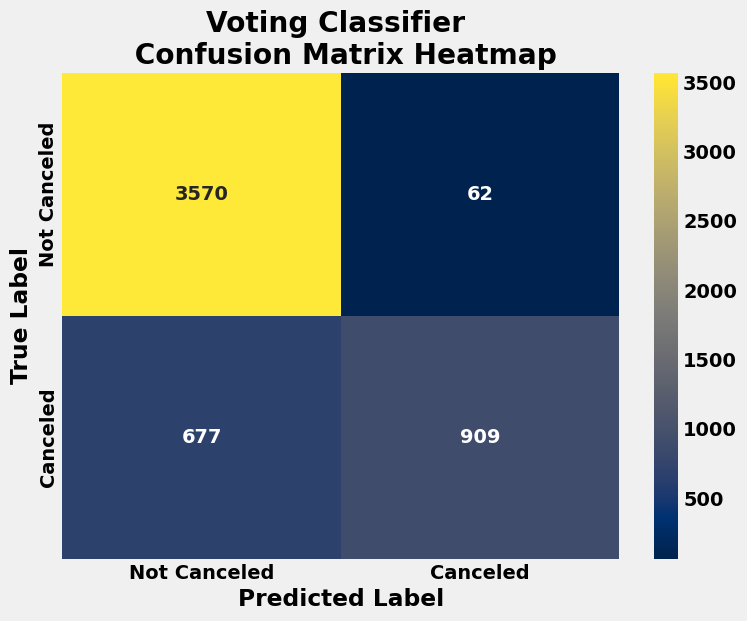

Accuracy Score of Voting Classifier is : 0.8583748562667689
Confusion Matrix : 
[[3570   62]
 [ 677  909]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3632
           1       0.94      0.57      0.71      1586

    accuracy                           0.86      5218
   macro avg       0.89      0.78      0.81      5218
weighted avg       0.87      0.86      0.85      5218



In [22]:
y_pred_vc = vc.predict(x_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="cividis", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Voting Classifier \n Confusion Matrix Heatmap")
plt.show()

print(f"Accuracy Score of Voting Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")



### The voting classifer model slightly outperforms the logistic regression model in every important metric so I will save this model.

In [23]:
# import pickle
# with open('cancelsense_voting_classifier_model', 'wb') as file:
#     pickle.dump(vc,file)
    

<a id='13.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">🧠</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">🧠</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🧠 ANN Classifier
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 18px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Artificial Neural Network
    </p>
</div>


In [24]:
cat_df = pd.read_csv('BW_bookings_cat_data_2021-present.csv')
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

guest_name: 
['CAMMISO,CHRISTINE' 'FURIA,PETER' 'Morlett,Richard' ... 'POWELL,ASHLEY'
 'AZURE,DOUGLAS' 'PAEK,SUNG']

date_booking_made: 
['2021-01-01' '2020-02-24' '2020-12-13' ... '2024-05-18' '2024-05-19'
 '2024-05-20']

scheduled_arrival: 
['2021-01-01' '2021-01-02' '2021-01-03' ... '2024-05-18' '2024-05-19'
 '2024-05-20']

discount: 
['PKG' 'EC9' 'BW' 'C1' '0' 'EP' '9QB' 'EX1' 'MR' 'AAA' 'SR9' 'zzE8' 'FX'
 'C2' 'zzB8' 'OI' 'BK1' 'zzS8' 'FF' 'zzIT' 'AARP' 'EXR' 'BK5' 'BK9' 'EC1'
 'zzIB' '2UB' '1000' 'GM' 'zzEW' 'SR1' 'EX5' 'XW' '15A' '15D' '2U' 'zzAL'
 'XZ' 'FIT' 'CLC' 'EC5' 'COMP' '9Q' 'XN' 'FDRN' 'zzWY' 'zzX2' 'LP1' 'GTL'
 'FEDN' 'ATI' 'TFNN' 'BNL' 'SUNA' 'HB1' 'BBRN' '15C' 'Z7' 'Z2' 'zzWB'
 'TRHN' 'BWGM' 'zzSG' 'DATA' 'ECR' 'zzM2' 'zzM3' 'TERR' 'zzI4' 'FX2' 'LP2'
 'zzIC' 'HB9' 'ALE' 'HB2' 'SR5' 'OLSS' 'DIBE' 'HB5' 'EDUC' 'SUGN' 'MRK'
 'MADS' 'LC' 'RPC' 'SATC' 'AIA' 'C3' 'BBSN' 'CL3' 'ADOT' 'BC5' 'BC1' 'BC9'
 'FCMC' 'BCDC' 'MPG' 'GECN' 'SIEN' 'ABBN']

company: 
['0' 'KINDER MORGA'

In [25]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

# Assuming cat_df and unscaled_inputs are already defined and preprocessed

# Label encode categorical features
label_encoders = []
for column in cat_df.columns:
    le = LabelEncoder()
    cat_df[column] = le.fit_transform(cat_df[column])
    label_encoders.append(le)

# Combine the encoded categorical features with the unscaled numerical features
X = np.concatenate([cat_df.values, unscaled_inputs.values], axis=1).astype(np.float32)
y = to_categorical(targets)

# Check data types of X and y
print(f"X type: {X.dtype}, y type: {y.dtype}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

import keras
from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model

# Define the model
input_categorical = Input(shape=(cat_df.shape[1],), name='categorical_input')
input_numerical = Input(shape=(unscaled_inputs.shape[1],), name='numerical_input')

# Embedding layer for categorical features
embedded_categorical = Embedding(input_dim=len(cat_df.columns) * len(cat_df), output_dim=50, input_length=cat_df.shape[1])(input_categorical)
flattened_categorical = Flatten()(embedded_categorical)

# Combine embeddings with numerical features
concatenated = keras.layers.concatenate([flattened_categorical, input_numerical])

# Dense layers
dense_1 = Dense(20, activation='relu')(concatenated)
dense_2 = Dense(20, activation='relu')(dense_1)
output = Dense(2, activation='sigmoid')(dense_2)

# Compile the model
ann = Model(inputs=[input_categorical, input_numerical], outputs=output)
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
ann_history = ann.fit([X_train[:, :cat_df.shape[1]], X_train[:, cat_df.shape[1]:]], y_train, validation_data=([X_test[:, :cat_df.shape[1]], X_test[:, cat_df.shape[1]:]], y_test), callbacks=[early_stopping],epochs=5)
acc_ann = ann_history.history['accuracy']

X type: float32, y type: float32
Epoch 1/5
1468/1468 [==============================] - 213s 145ms/step - loss: 0.4631 - accuracy: 0.8184 - val_loss: 0.3694 - val_accuracy: 0.8390
Epoch 2/5
1468/1468 [==============================] - 206s 140ms/step - loss: 0.2406 - accuracy: 0.8958 - val_loss: 0.4236 - val_accuracy: 0.8264
Epoch 3/5
1468/1468 [==============================] - 207s 141ms/step - loss: 0.1099 - accuracy: 0.9538 - val_loss: 0.5078 - val_accuracy: 0.7949
Epoch 4/5
1468/1468 [==============================] - 205s 139ms/step - loss: 0.0820 - accuracy: 0.9625 - val_loss: 0.6066 - val_accuracy: 0.7453


### Judging by the validation loss values across all epochs, this ANN model is overfitted.
### The early stop callback function was triggered at epoch 4 due to the validation loss increasing  at every step.

### To combat overfitting, I will implement L2 regularizers
#### 1. L1 Regularization (Lasso):
- L1 regularization adds a penalty term to the loss function that is proportional to the absolute value of the weights.
- This penalty encourages the model to reduce the magnitude of the weights, effectively pushing some of them to zero.
- By forcing some weights to be zero, L1 regularization performs feature selection, selecting the most important features and ignoring the less important ones.
- This can prevent the model from fitting noise in the training data and improve its ability to generalize to new, unseen data.

####  2. L2 Regularization (Ridge):
- L2 regularization adds a penalty term to the loss function that is proportional to the square of the weights.
- This penalty encourages the model to keep the weights small but does not force them to be exactly zero.
- By forcing some weights to be zero, L1 regularization performs feature selection, selecting the most important features and ignoring the less important ones.
- This can prevent the model from fitting noise in the training data and improve its ability to generalize to new, unseen data.


In [26]:
from keras.regularizers import l2
from keras.optimizers import Adam

# Define the model
input_categorical = Input(shape=(cat_df.shape[1],), name='categorical_input')
input_numerical = Input(shape=(unscaled_inputs.shape[1],), name='numerical_input')

# Embedding layer for categorical features
embedded_categorical = Embedding(input_dim=len(cat_df.columns) * len(cat_df), output_dim=50, input_length=cat_df.shape[1])(input_categorical)
flattened_categorical = Flatten()(embedded_categorical)

# Combine embeddings with numerical features
concatenated = keras.layers.concatenate([flattened_categorical, input_numerical])

# Dense layers with L2 regularization
dense_1 = Dense(5, activation='relu', kernel_regularizer=l2(0.02))(concatenated)
dense_2 = Dense(5, activation='relu', kernel_regularizer=l2(0.02))(dense_1)
dense_3 = Dense(5, activation='relu', kernel_regularizer=l2(0.02))(dense_2)
dense_4 = Dense(5, activation='leaky_relu', kernel_regularizer=l2(0.05))(dense_3)
output = Dense(2, activation='sigmoid')(dense_4)

# Compile the model
ann = Model(inputs=[input_categorical, input_numerical], outputs=output)
ann.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
ann_history = ann.fit([X_train[:, :cat_df.shape[1]], X_train[:, cat_df.shape[1]:]], y_train, validation_data=([X_test[:, :cat_df.shape[1]], X_test[:, cat_df.shape[1]:]], y_test), callbacks=[early_stopping],epochs=5)
acc_ann = ann_history.history['accuracy']

Epoch 1/5
1468/1468 [==============================] - 181s 123ms/step - loss: 0.5150 - accuracy: 0.7941 - val_loss: 0.4915 - val_accuracy: 0.7882
Epoch 2/5
1468/1468 [==============================] - 171s 117ms/step - loss: 0.4417 - accuracy: 0.8197 - val_loss: 0.4361 - val_accuracy: 0.8216
Epoch 3/5
1468/1468 [==============================] - 170s 116ms/step - loss: 0.3126 - accuracy: 0.9061 - val_loss: 0.5043 - val_accuracy: 0.8151
Epoch 4/5
1468/1468 [==============================] - 179s 122ms/step - loss: 0.2242 - accuracy: 0.9391 - val_loss: 0.5509 - val_accuracy: 0.8193


<a id='14.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 50%; left: 10px; transform: translateY(-50%); font-size: 24px;">🏆</div>
    <div style="position: absolute; top: 50%; right: 10px; transform: translateY(-50%); font-size: 24px;">🏆</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🏆 Models Showdown Results
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
</div>


In [27]:
acc_ann = ann_history.history['accuracy'][-3]
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, acc_vtc, acc_ann]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
10,Voting Classifier,0.858375
6,XgBoost,0.857417
7,Cat Boost,0.857033
5,Gradient Boosting Classifier,0.854925
0,Logistic Regression,0.852236
8,Extra Trees Classifier,0.848409
3,Random Forest Classifier,0.848218
9,LGBM,0.834419
11,ANN,0.819719
4,Ada Boost Classifier,0.798773


<a id='15.0'></a>
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 40px; border-radius: 15px; box-shadow: 0 10px 20px rgba(0,0,0,0.4); margin: 20px 0; position: relative; overflow: hidden;">
    <div style="position: absolute; top: 10px; left: 10px; font-size: 24px;">🎉</div>
    <div style="position: absolute; top: 10px; right: 10px; font-size: 24px;">🎈</div>
    <div style="position: absolute; bottom: 10px; left: 10px; font-size: 24px;">🏆</div>
    <div style="position: absolute; bottom: 10px; right: 10px; font-size: 24px;">🎊</div>
    <h2 style="font-size: 36px; color: #00fff5; font-family: 'Courier New', monospace; text-align: center; margin: 0; text-shadow: 2px 2px 4px #000;">
        🏆 Winner: XgBoost
    </h2>
    <div style="background: rgba(78, 204, 163, 0.2); height: 4px; width: 60%; margin: 20px auto;"></div>
    <p style="color: #e8e8e8; font-size: 24px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        Accuracy: 0.857417
    </p>
</div>
